In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
import pprint
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import LabelEncoder

In [3]:
data_ld=pd.read_csv("cleaned_data.csv")

In [4]:
data_ld.head()

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\r\nJob ID: 310709\r...     3.8   
4  Data Scientist\r\nAffinity Solutions / Marketi...     2.9   

                                   Company Name         Location  \
0                      Tecolote Research\r\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\r\n3.4    Linthicum, MD   
2                                KnowBe4\r\n4.8   Clearwater, FL   
3                                   PNNL\r\n3.8     Richland, WA   
4                     Affinity Solutions\r\n2.9     New York, NY   

     Headquarters                    Size  Founded  ... spark aws sql excel  \
0      Goleta, CA   501 to 1000 employees     1973  ...     0   0   0     1   
1   Baltimore, MD        10000+ employees     1984  ...     0   0   0     0   
2  Clearwater, FL   501 to 1000 employees     2010  ...     1   0   1     1   
3    Richland, WA  1001 to 5000 employees     1965  ...     0   0   0     0   
4    New York, NY     51 to 200 employees     1998  ...     0   0   1     1   

  matlab  desc_len   level  title  comp                                   name  
0      1      2555   other     DS     0                      Tecolote Research  
1      0      4828  higher     DS     0  University of Maryland Medical System  
2      0      3495  higher     DS     0                                KnowBe4  
3      0      3926  higher    mle     3                                   PNNL  
4      0      2748  senior     DS     3                     Affinity Solutions  

[5 rows x 36 columns]

In [5]:
data_ld.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'hourly', 'employer_provided',
       'job_state', 'same_state', 'age', 'python', 'r', 'sas', 'spark', 'aws',
       'sql', 'excel', 'matlab', 'desc_len', 'level', 'title', 'comp', 'name'],
      dtype='object')

In [6]:
data = data_ld.drop(['Unnamed: 0','Job Title','Salary Estimate','Job Description','Company Name','Founded','Competitors'], axis=1)

In [7]:
data.head()

Rating         Location    Headquarters                    Size  \
0     3.8  Albuquerque, NM      Goleta, CA   501 to 1000 employees   
1     3.4    Linthicum, MD   Baltimore, MD        10000+ employees   
2     4.8   Clearwater, FL  Clearwater, FL   501 to 1000 employees   
3     3.8     Richland, WA    Richland, WA  1001 to 5000 employees   
4     2.9     New York, NY    New York, NY     51 to 200 employees   

    Type of ownership                          Industry  \
0   Company - Private               Aerospace & Defense   
1  Other Organization  Health Care Services & Hospitals   
2   Company - Private                 Security Services   
3          Government                            Energy   
4   Company - Private           Advertising & Marketing   

                         Sector                           Revenue  min_salary  \
0           Aerospace & Defense         $50 to $100 million (USD)          53   
1                   Health Care            $2 to $5 billion (USD)          63   
2             Business Services        $100 to $500 million (USD)          80   
3  Oil, Gas, Energy & Utilities  $500 million to $1 billion (USD)          56   
4             Business Services          Unknown / Non-Applicable          86   

   max_salary  ...  spark  aws  sql excel  matlab  desc_len   level  title  \
0          91  ...      0    0    0     1       1      2555   other     DS   
1         112  ...      0    0    0     0       0      4828  higher     DS   
2          90  ...      1    0    1     1       0      3495  higher     DS   
3          97  ...      0    0    0     0       0      3926  higher    mle   
4         143  ...      0    0    1     1       0      2748  senior     DS   

   comp                                   name  
0     0                      Tecolote Research  
1     0  University of Maryland Medical System  
2     0                                KnowBe4  
3     3                                   PNNL  
4     3                     Affinity Solutions  

[5 rows x 29 columns]


 mu = 101.43 and sigma = 37.52



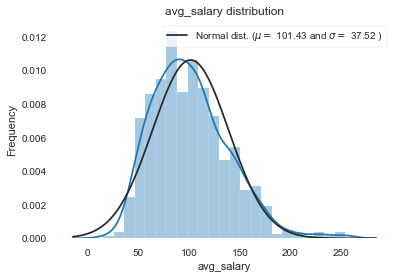

In [8]:
sns.distplot(data['avg_salary'] , fit=norm);


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['avg_salary'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('avg_salary distribution')

plt.show()

In [9]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)
pd.pivot_table(data, index = ['job_state','title'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state title            
WI        other           4
          DS              1
          A               5
WA        other           2
          mle             5
          DS             11
          A               3
VA        other           6
          mle             4
          DS             19
          DE              6
          A               6
UT        DE              3
          A               4
          DS              3
TX        other           7
          mle             1
          DS             14
          DE              6
TN        other           5
          DS              2
          DE              4
          A               2
SC        other           1
RI        other           1
PA        DE              1
          A               8
          DS              8
          other           3
          mle            13
OR        DS              4
OH        other           3
          mle             4
          DS              5
          A               2
NY        other           5
          mle             6
          DS             40
          DE              3
          A              18
NM        DS              3
NJ        DE              2
          A               8
          other           1
          DS              6
NE        other           4
NC        other          12
          DS              6
          DE              3
MO        other           2
          DS              4
          DE              1
          A               2
MN        other           2
MI        other           2
          DS              4
MD        other          13
          mle             1
          DS             15
          DE              5
          A               1
MA        other          44
          mle             3
          DS             42
          DE             10
          A               4
LA        other           3
          A               1
KY        DS              2
          other           4
KS        mle             3
IN        other           3
          mle             4
          DS              3
IL        other          10
          mle             2
          DS             15
          DE              5
          A               8
ID        DS              1
          A               1
IA        DE              3
          A               2
GA        A               1
          DS              2
          other           3
FL        other           2
          DS              7
          DE              3
          A               4
DE        other           6
DC        mle             1
          DS              5
          DE              3
          A               2
CT        DS              2
          other           3
CO        DS              3
          A               1
          DE              3
          other           3
          mle             1
CA        other          26
          mle            17
          DS             77
          DE             16
          A              16
AZ        DS              3
          DE              3
          A               1
          other           2
AL        DS              1
          DE              1
          other           1
          A               5

In [10]:
profile1 = ProfileReport(data, title="Profiling Report")


In [11]:
profile1.to_widgets()


In [12]:
profile1.to_notebook_iframe()


In [13]:
profile1.to_file("profileReport_1.html")


In [14]:
#type of ownership
data=data.drop(data.index[581])

In [15]:
#rating
m=data.Rating.median()
data.Rating= data.Rating.apply(lambda x: m if x==-1 else x)

In [16]:
#industry
data['Industry']= data['Industry'].apply(lambda x: "Health" if x=='-1' else x)

In [17]:
#sector
data['Sector']= data['Sector'].apply(lambda x: "Health" if x=='-1' else x)

In [18]:
#age
m=data.age.mean()
data['age']=data['age'].apply(lambda x: m if x==-1 else x)

In [19]:
#dataset of dummies data
data_dum=pd.get_dummies(data.drop(['min_salary','Location','Headquarters','max_salary','name','r'], axis=1))

In [20]:
#encoder
cols = ('Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','job_state','level','title','name')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))


In [21]:
data.head()

Rating  Location  Headquarters  Size  Type of ownership  Industry  Sector  \
0     3.8         3            71     5                  1         2       1   
1     3.4        99            11     1                  6        28      12   
2     4.8        42            42     5                  1        46       5   
3     3.8       154           149     2                  3        17      19   
4     2.9       122           117     6                  1         1       5   

   Revenue  min_salary  max_salary  ...  spark  aws  sql  excel  matlab  \
0        9          53          91  ...      0    0    0      1       1   
1        5          63         112  ...      0    0    0      0       0   
2        4          80          90  ...      1    0    1      1       0   
3       10          56          97  ...      0    0    0      0       0   
4       12          86         143  ...      0    0    1      1       0   

   desc_len  level  title  comp  name  
0      2555      2      2     0   293  
1      4828      0      2     0   319  
2      3495      0      2     0   164  
3      3926      0      3     3   216  
4      2748      3      2     3    13  

[5 rows x 29 columns]

In [22]:
#profile report of encoded dataset
profile = ProfileReport(data, title="Profiling Report")
profile.to_file("profileReport_Enc.html")


In [23]:
#profile report of dummied dataset
profile = ProfileReport(data_dum, title="Profiling Report")
profile.to_file("profileReport_Dum.html")

In [24]:
data.to_csv("analysed.csv", index=False)

In [25]:
data_dum.to_csv("an_dum.csv", index=False)